
--- Shape ---
(41188, 21)

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  flo

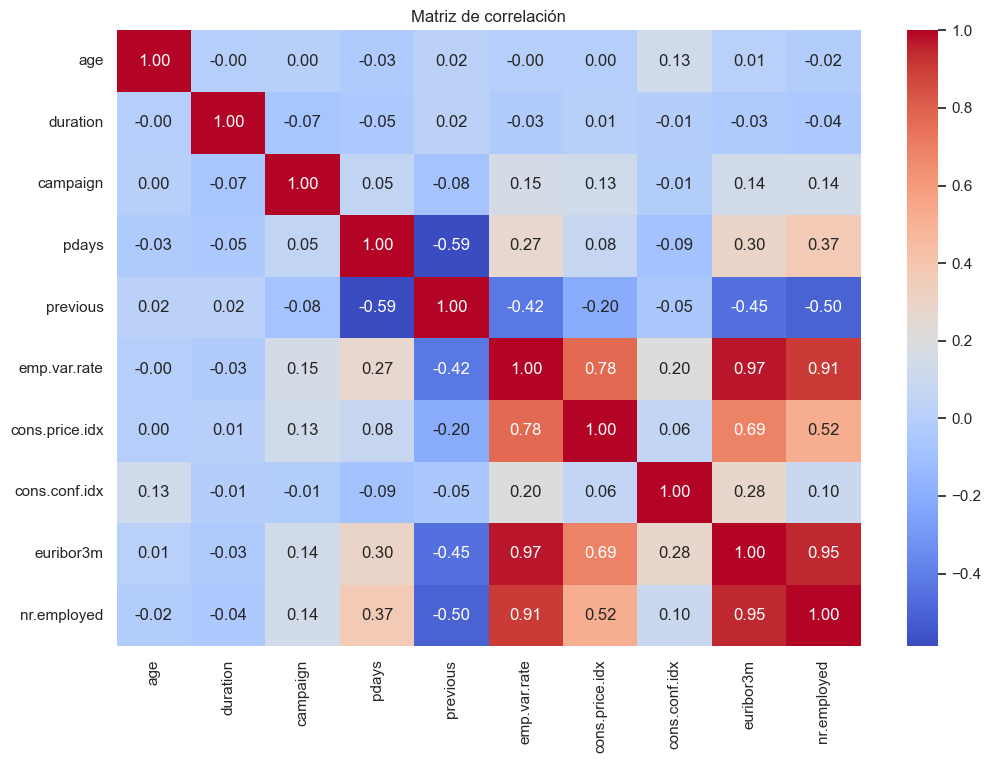

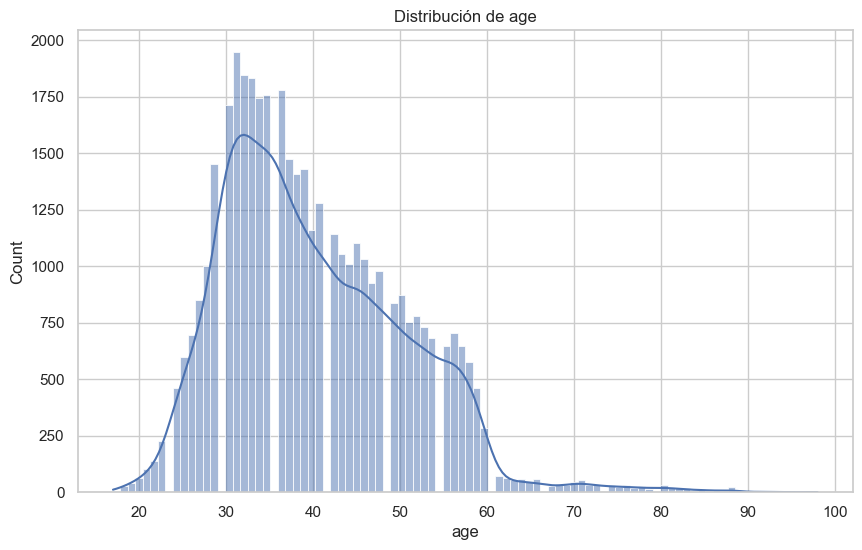

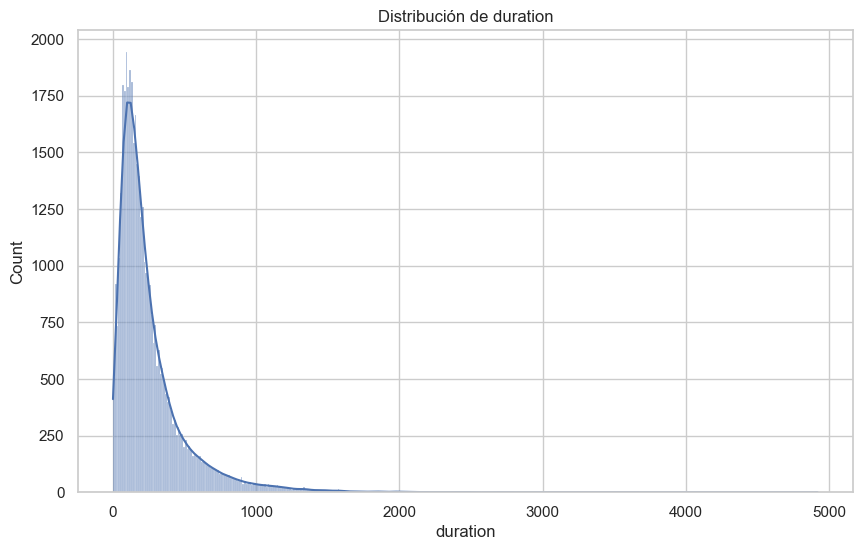

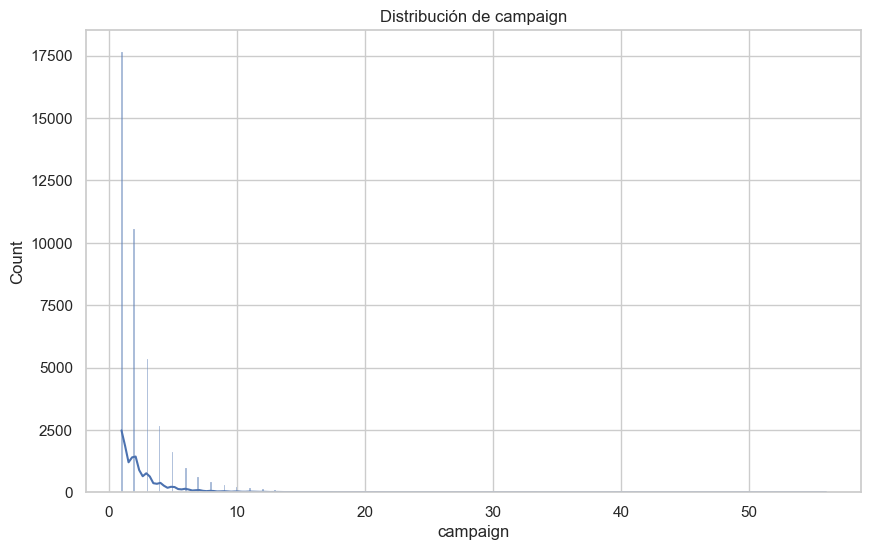

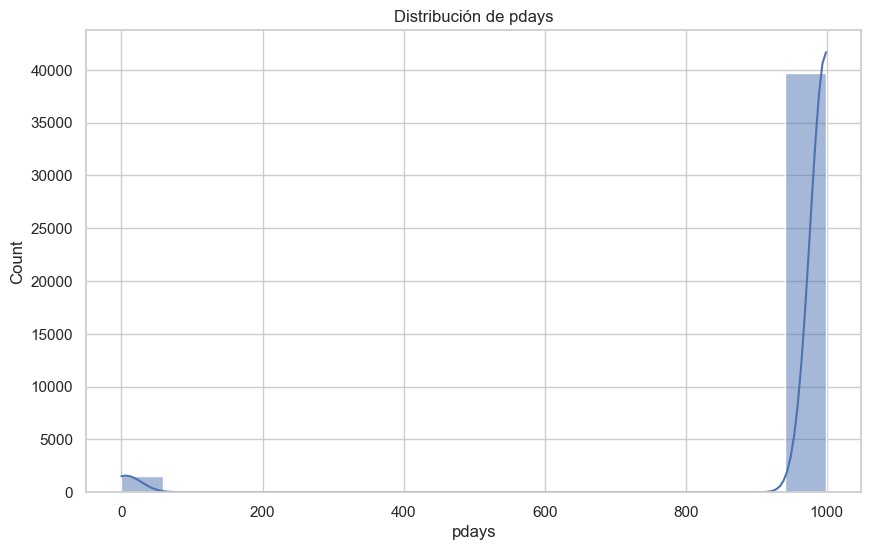

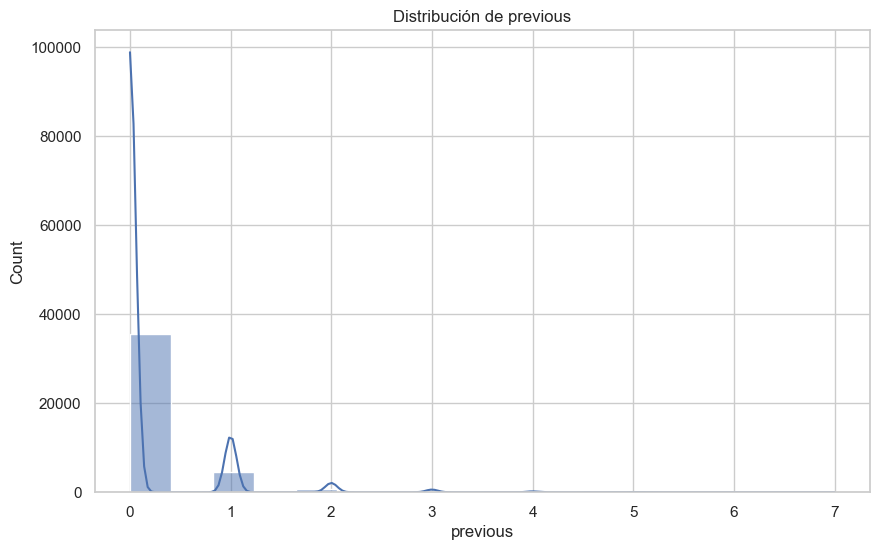

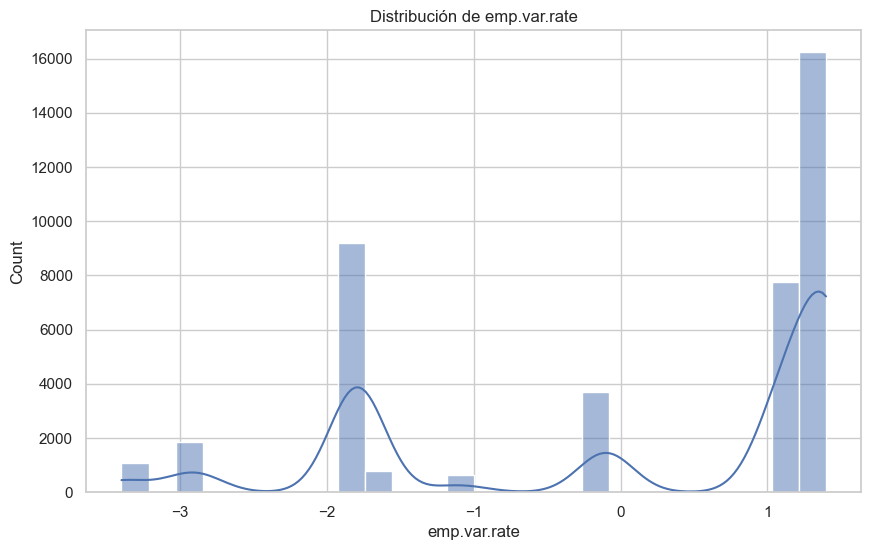

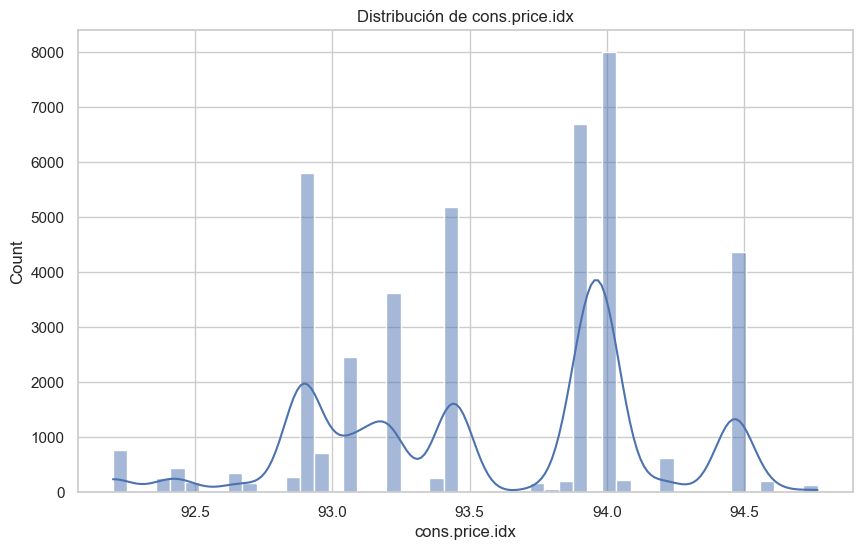

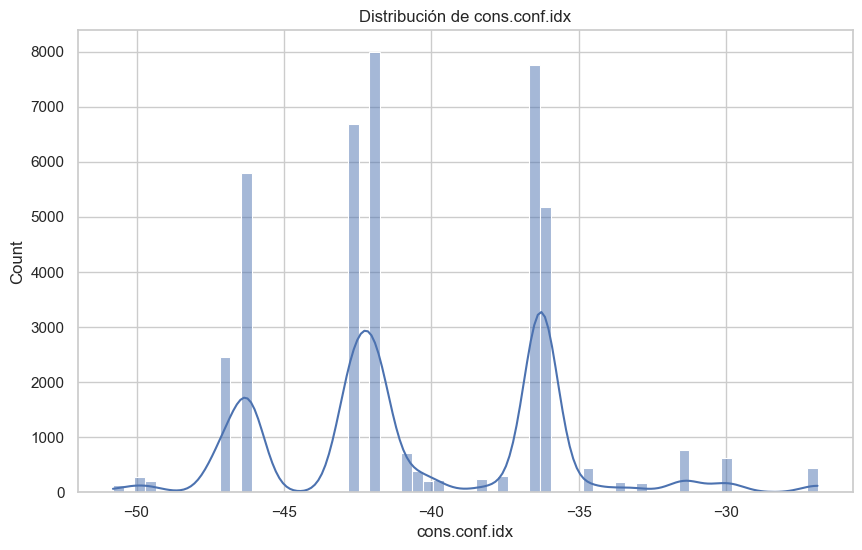

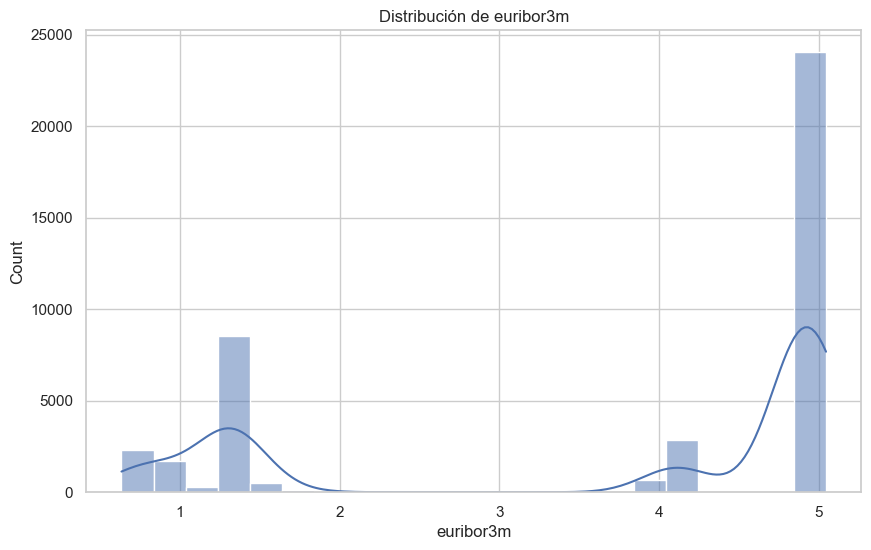

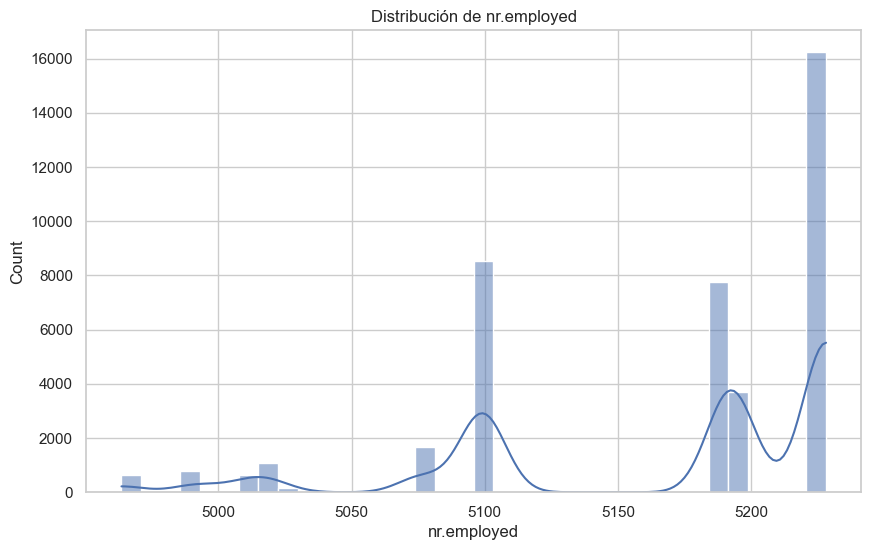

Variables eliminadas por alta correlación: ['euribor3m', 'nr.employed']

--- Registros por estado civil ---
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

--- Registros por educación ---
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

--- Registros por tipo de trabajo ---
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64


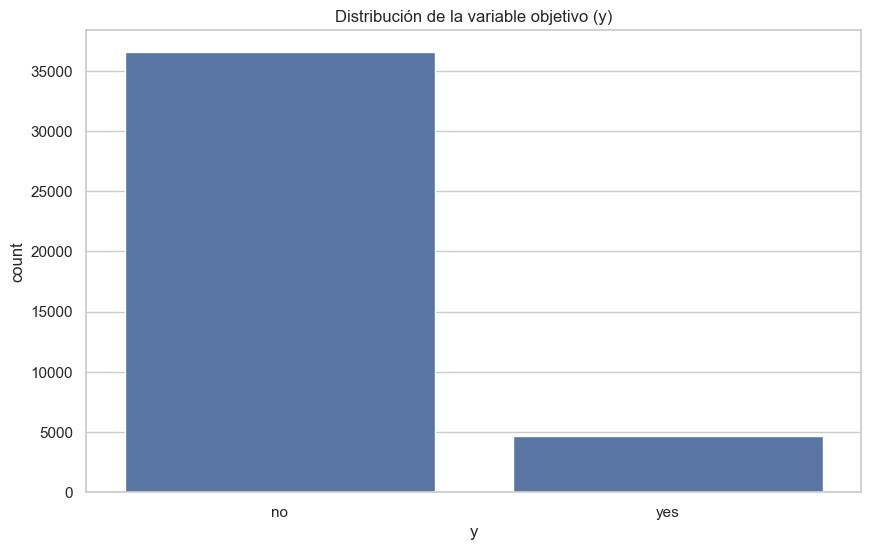

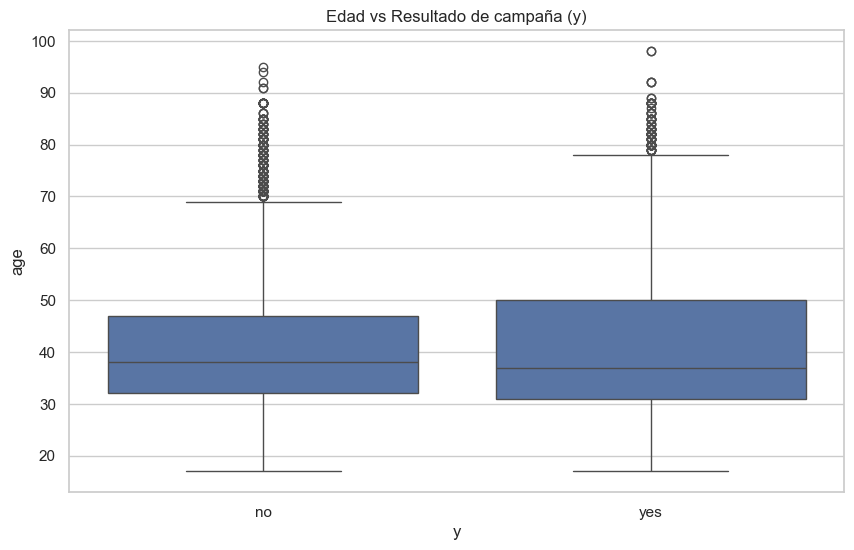

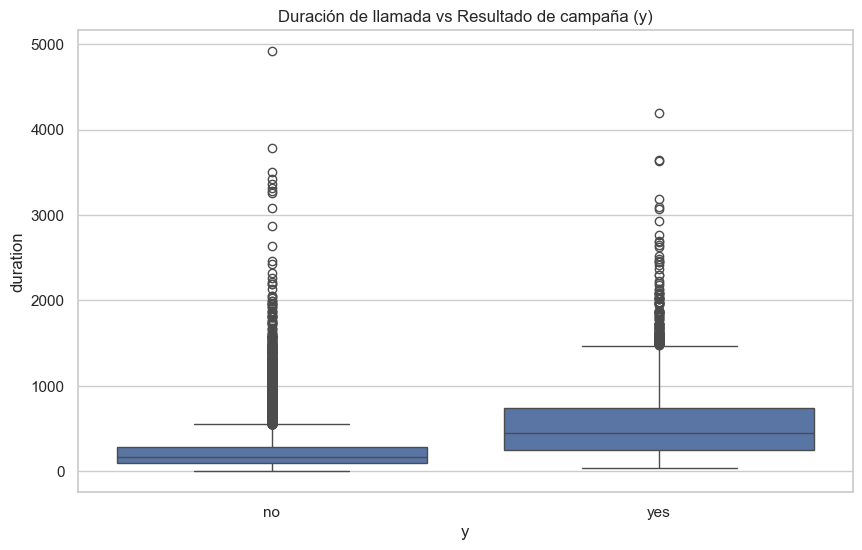

Tamaño de training set: (28831, 51)
Tamaño de test set: (12357, 51)


In [1]:
# 1. Importación de librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Configuración estética
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 2. Cargar el dataset
df = pd.read_csv("bank-additional-full.csv", sep=';')  # separador ; según el dataset original
df.head()

# 3. Exploración básica (EDA)
print("\n--- Shape ---")
print(df.shape)

print("\n--- Info ---")
print(df.info())

print("\n--- Tail ---")
print(df.tail(3))

print("\n--- Sample ---")
print(df.sample(3))

print("\n--- Tipos de datos ---")
print(df.dtypes)

print("\n--- Nulos ---")
print(df.isnull().sum())

print("\n--- Describe ---")
print(df.describe(include='all').transpose())

print("\n--- Valores únicos por columna ---")
print(df.nunique())

# 4. Correlación y Heatmap
# Para correlación solo numéricas
corr = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

# 5. Distribución de variables numéricas
for col in df.select_dtypes(include=[np.number]).columns:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribución de {col}")
    plt.show()

# 6. Eliminar variables con alta correlación (> 0.85)
threshold = 0.85
corr_matrix = df.select_dtypes(include=[np.number]).corr().abs()

# Triángulo superior de la matriz
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print(f"Variables eliminadas por alta correlación: {to_drop}")
df = df.drop(columns=to_drop)

# 7. Reportes por grupos
print("\n--- Registros por estado civil ---")
print(df['marital'].value_counts())

print("\n--- Registros por educación ---")
print(df['education'].value_counts())

print("\n--- Registros por tipo de trabajo ---")
print(df['job'].value_counts())

# 8. Análisis univariado y bivariado (target 'y')
sns.countplot(x='y', data=df)
plt.title("Distribución de la variable objetivo (y)")
plt.show()

# Bivariado: ejemplo con edad y balance
sns.boxplot(x='y', y='age', data=df)
plt.title("Edad vs Resultado de campaña (y)")
plt.show()

sns.boxplot(x='y', y='duration', data=df)
plt.title("Duración de llamada vs Resultado de campaña (y)")
plt.show()

# 9. División Train/Test
# Variables independientes y dependiente
X = df.drop(columns=['y'])
y = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Variables categóricas -> dummies
X = pd.get_dummies(X, drop_first=True)

# Escalado de variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print(f"Tamaño de training set: {X_train.shape}")
print(f"Tamaño de test set: {X_test.shape}")
